In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [18]:
# If using local file
# df = pd.read_csv('path/to/titanic.csv')

# Using seaborn's built-in dataset
df = sns.load_dataset('titanic')


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.3815

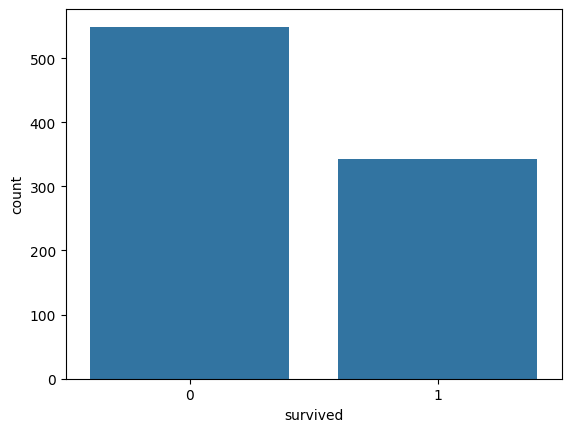

In [19]:
# Display the first few rows
print(df.head())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='survived', data=df)
plt.show()


In [20]:
# Fill missing age values with the median age
df['age'].fillna(df['age'].median(), inplace=True)

# Drop rows where 'embarked' is missing
df.dropna(subset=['embarked'], inplace=True)

# Drop columns that are not needed
df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'], axis=1, inplace=True)

# Check again for missing values
print(df.isnull().sum())


survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


/tmp/ipykernel_9982/1759291567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [21]:
# Convert categorical columns to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Drop rows with missing 'age' values
df.dropna(subset=['age'], inplace=True)


In [22]:
# Define features and target variable
X = df.drop(['survived'], axis=1)
y = df['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [25]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy in percentage with two decimal points
print(f'Accuracy: {accuracy:.2%}')


[[84 25]
 [16 53]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.68      0.77      0.72        69

    accuracy                           0.77       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.78      0.77      0.77       178

Accuracy: 76.97%
